# Выбор локации для скважины

Перед нами задача из добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Загрузка и обзор данных

In [ ]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_dфata_2.csv')

 Регион №1: 
Количетво дубликатов: 0
Первые строки:
       id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647

Информация по столбцам:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Статистика:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Распределение объема запасов:


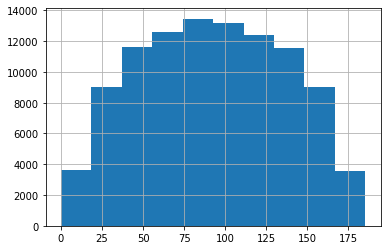

Распределение признаков:


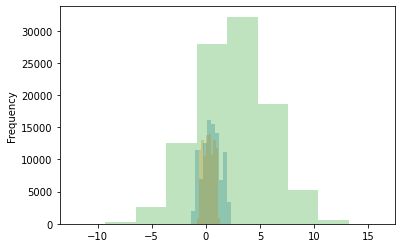

 Регион №2: 
Количетво дубликатов: 0
Первые строки:
       id         f0        f1        f2     product
0  kBEdx -15.001348 -8.276000 -0.005876    3.179103
1  62mP7  14.272088 -3.475083  0.999183   26.953261
2  vyE1P   6.263187 -5.948386  5.001160  134.766305

Информация по столбцам:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Статистика:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Распределение объема запасов:


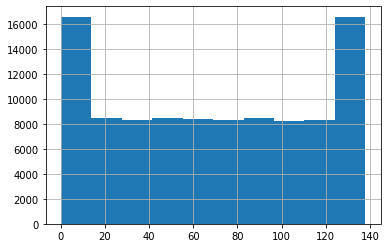

Распределение признаков:


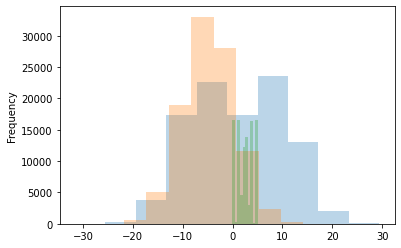

 Регион №3: 
Количетво дубликатов: 0
Первые строки:
       id        f0        f1        f2    product
0  fwXo0 -1.146987  0.963328 -0.828965  27.758673
1  WJtFt  0.262778  0.269839 -2.530187  56.069697
2  ovLUW  0.194587  0.289035 -5.586433  62.871910

Информация по столбцам:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Статистика:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Распределение объема запасов:


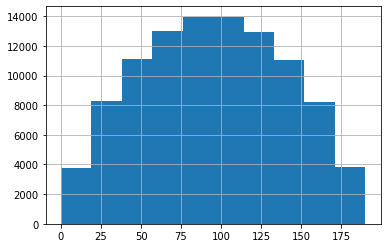

Распределение признаков:


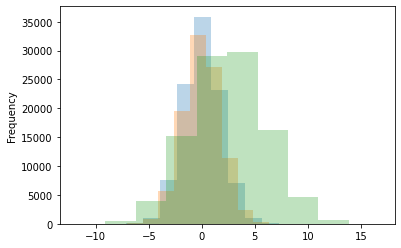

In [ ]:
count = 1
for data in data_0,data_1,data_2:
    print(f'\033[1m Регион №{count}: \033[0m')
    count += 1
    print('Количетво дубликатов:', data.duplicated().sum())
    print('Первые строки:\n',data.head(3))
    print('\nИнформация по столбцам:')
    display(data.info())
    print('\nСтатистика:')
    display(data.describe())
    print('Распределение объема запасов:')
    data['product'].hist()
    plt.show()
    plt.close()
    print('Распределение признаков:')
    for col in 'f0', 'f1', 'f2':
        data[col].plot(kind='hist', alpha=.3)
    plt.show()


### Выводы по обзору
- Дефектов в данных нет (нет дубликатов, нет пропусков, типы данных корректны)
- Есть лишний столбец `id`, не несущий информации
- Распределение целевого признака нормальное в 1 и 3 регионах, а во втором соответствует равномерному с двумя пиками в минимальных и максимальных значениях.

### Предобработка и подготовка данных

In [ ]:
# Столбец 'id' не несёт никакой полезной информации, удалили его
data_0 = data_0.drop('id', axis=1)
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)
print(data_0.head(3))
print(data_1.head(3))
print(data_2.head(3))

         f0        f1        f2     product
0  0.705745 -0.497823  1.221170  105.280062
1  1.334711 -0.340164  4.365080   73.037750
2  1.022732  0.151990  1.419926   85.265647
          f0        f1        f2     product
0 -15.001348 -8.276000 -0.005876    3.179103
1  14.272088 -3.475083  0.999183   26.953261
2   6.263187 -5.948386  5.001160  134.766305
         f0        f1        f2    product
0 -1.146987  0.963328 -0.828965  27.758673
1  0.262778  0.269839 -2.530187  56.069697
2  0.194587  0.289035 -5.586433  62.871910


Рассмотрели внимательнее данные в регионе с ненормальным распределением объема продукта. Разделили данные на блоки: первый пик, плато и второй пик (границы пиков взяли в значениях 20 и 120):

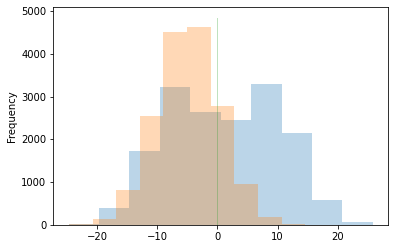

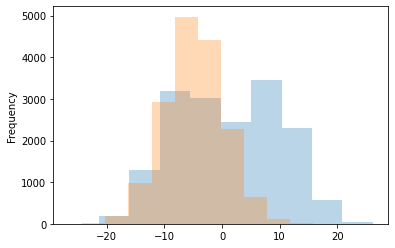

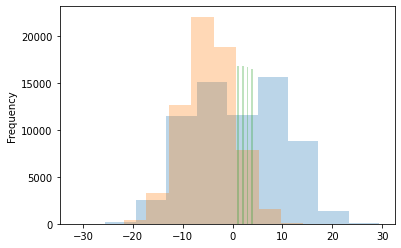

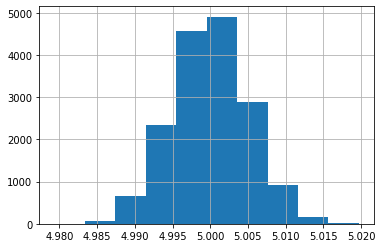

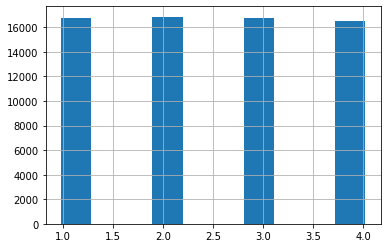

In [ ]:
low_prod = data_1[data_1['product'] < 20]
high_prod = data_1[data_1['product'] > 120]
mid_prod = data_1[(data_1['product'] > 20) & (data_1['product'] < 120)]

# Посмотрим на распределение нецелевых признаков в каждом блоке:
for bloc in low_prod, high_prod, mid_prod:
    for col in 'f0', 'f1', 'f2':
        bloc[col].plot(kind='hist', alpha=.3)
    plt.show()
    plt.close()

# Распределение признака 'f2' в блоке второго пика не видно, вероятно из-за масштаба
# Построили гистограмму только для этого признака
high_prod['f2'].hist()
plt.show()
plt.close()

# Приблизили гистограмму для этого же признака в блоке плато
mid_prod['f2'].hist()
plt.show()
plt.close()

Написали функцию для разделения данных на выборки и использовали её:


In [ ]:
def features_target_split(data):
    features = data.drop('product', axis=1)
    target = data['product']
    X_train, X_valid, y_train, y_valid = train_test_split(features, target,
                                                test_size=.25, random_state=52, stratify=pd.qcut(target, 10))
    for X in X_train, X_valid:
        X = pd.DataFrame(X_train, columns=['f0','f1','f2'])
    print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)
    return  X_train, X_valid, y_train, y_valid

In [ ]:
data0_X_train, data0_X_valid, data0_y_train, data0_y_valid = features_target_split(data_0)
data1_X_train, data1_X_valid, data1_y_train, data1_y_valid = features_target_split(data_1)
data2_X_train, data2_X_valid, data2_y_train, data2_y_valid = features_target_split(data_2)

(75000, 3) (25000, 3) (75000,) (25000,)
(75000, 3) (25000, 3) (75000,) (25000,)
(75000, 3) (25000, 3) (75000,) (25000,)


In [1]:
Написали функцию для масштабирования признаков и применили её:

SyntaxError: ignored

In [ ]:
def data_scale(X_train, X_valid):
    columns = ['f0','f1','f2']
    scaler = StandardScaler()
    scaler.fit(X_train[columns])
    X_train[columns] = scaler.transform(X_train[columns])
    X_valid[columns] = scaler.transform(X_valid[columns])
    for col in 'f0', 'f1', 'f2':
        X_valid[col].plot(kind='hist', alpha=.3)
    plt.show()
    return X_train, X_valid

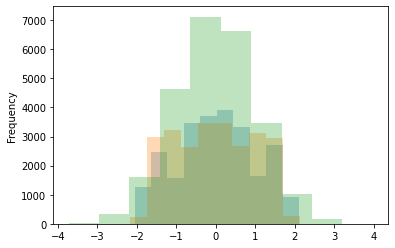

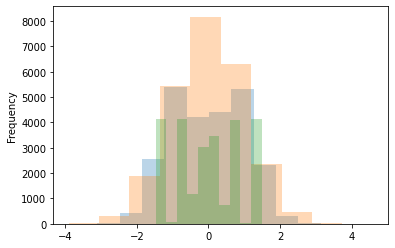

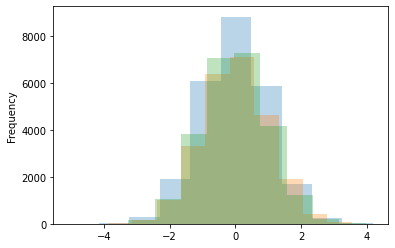

In [ ]:
data0_X_train, data0_X_valid = data_scale(data0_X_train, data0_X_valid)
data1_X_train, data1_X_valid = data_scale(data1_X_train, data1_X_valid)
data2_X_train, data2_X_valid = data_scale(data2_X_train, data2_X_valid)

### Итоги предобработки:
- Избавились от лишнего столбца, не несущего полезной информации
- Нашли вероятную причину необычного распределения во втором регионе: **один из признаков ('f2') имеет необычное распределение:** (для низких значений продукта практичеки равен нулю, для значений до 120 равномерно распределён в интервале 1-4 и для значений более 120 равен 5 с очень малым разбросом)
- Проверели распределение нецелевых признаков в каждом регионе
    - Во всех трёх регионах нецелевые признаки имеют разный разброс, особенно в первых двух регионах
    - Масштабировали нецелевые признаки, чтобы они вносили равный вклад в обучение модели

## Обучение и проверка модели Линейной регрессии

Написали функцию для обучения модели Линейной регрессии и расчёта и вывода необходимых метрик. Обучили модель на данных по трем регионам и вывели необходимые метрики:


In [ ]:
def linear_model(X_train, X_valid, y_train, y_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    prediction = model.predict(X_valid)
    mse = mean_squared_error(y_valid, prediction)
    print(f'Средний запас продукта по предсказанию: {prediction.mean()}')
    print(f'RMSE: {mse ** 0.5}')
    const_prediction = pd.Series(y_train.mean(), index=y_valid.index)
    mse = mean_squared_error(y_valid, const_prediction)
    print(f'Средний запас продукта по константной модели: {const_prediction.mean()}')
    print(f'RMSE для константной модели: {mse ** 0.5}\n')
    return prediction

In [ ]:
data0_prediction = linear_model(data0_X_train, data0_X_valid, data0_y_train, data0_y_valid)
data1_prediction = linear_model(data1_X_train, data1_X_valid, data1_y_train, data1_y_valid)
data2_prediction = linear_model(data2_X_train, data2_X_valid, data2_y_train, data2_y_valid)

Средний запас продукта по предсказанию: 92.523068099708
RMSE: 37.67573162836105
Средний запас продукта по константной модели: 92.50852594499943
RMSE для константной модели: 44.34160099196589

Средний запас продукта по предсказанию: 68.83159554430485
RMSE: 0.8850997818596884
Средний запас продукта по константной модели: 68.82552892895151
RMSE для константной модели: 45.9358603945075

Средний запас продукта по предсказанию: 95.0009289563582
RMSE: 40.03030982132799
Средний запас продукта по константной модели: 95.01115960462309
RMSE для константной модели: 44.76023374357684



### Выводы по модели
- Показатели RMSE для моделей во всех трёх регионах лучше, чем для константных моделей, то есть модели хорошо обучились.
    - RMSE для модели по второму региону близка к значению 1 судя по всему из-за особенностей распределения данных в этом регионе (близкое к равномерному распределению).
- Средний запас продукта по предсказанию обученной модели и по расчётам константной модели совпадает в каждом регионе, что так же говорит о хорошей работе моделей, так как из-за характера распределения данных истинное среднее значение целевого признака равняется среднему значению для константной модели.

## Подготовка к расчёту прибыли

### Сохранение ключевых значений в переменных и расчёт минимального объема продукта для безубыточной разработки

In [ ]:
# Количество скважин при разведке
SCOUT = 500
# Количество лучших выбираемых скважин
TOP = 200
# Бюджет на разработку скважин
CAPITAL = 10*10**9
# Цена за единицу продукта
PRODUCT_PRICE = 0.45*10**6
# Минимальные объемы продукта в скважине для безубыточной разработки
MIN_PRODUCT = CAPITAL/TOP/PRODUCT_PRICE
MIN_PRODUCT

111.11111111111111

### Подготовка таблиц для дальнейших расчетов

In [ ]:
# Объединим данные с предсказаниями
df_0 = data0_X_valid
df_0['fact'] = data0_y_valid
df_0['pred'] = data0_prediction
print(df_0.head())

df_1 = data1_X_valid
df_1['fact'] = data1_y_valid
df_1['pred'] = data1_prediction
print(df_1.head())

df_2 = data2_X_valid
df_2['fact'] = data2_y_valid
df_2['pred'] = data2_prediction
print(df_2.head())

             f0        f1        f2        fact        pred
69719 -0.405500 -0.698177  0.092900   79.468757   98.051841
71535 -0.754257  1.740306  2.352777  135.898417  128.296753
18051  1.708996  0.589397 -1.047712   60.242551   71.550582
91042 -0.324213  0.460982  0.009909  113.469172   88.422099
55416  0.628321 -1.465056 -0.565535  128.313736   92.712895
             f0        f1        f2        fact        pred
53636  1.713436  2.492993  0.885082  107.813044  106.964871
41396 -0.329195  0.368865 -0.295169   57.085625   55.659416
29530 -0.603083  0.122041  0.883990  110.992147  110.182150
47870 -0.551206 -1.060439 -0.880799   30.132364   29.216659
96966 -0.455633 -0.291128 -0.879887   30.132364   29.049514
             f0        f1        f2        fact        pred
69283  1.196545  0.664115 -1.439447   89.004458   66.198313
72395 -0.083835 -1.298883  1.848077  155.211360  131.933707
18565 -0.037507  1.187054 -0.260709   60.328194   89.737797
90953  1.129915 -1.816178 -0.804477  109

### Расчётная прибыль

Написали функцию для расчета прибыли по наиболее перспективным скважинам и применили её:

In [ ]:
def total_revenue(data):
    data_top = data.sort_values(by='pred',ascending=False).head(TOP)
    total_product = sum(data_top['fact'])
    revenue = PRODUCT_PRICE * total_product - CAPITAL
    return revenue

In [ ]:
print(total_revenue(df_0))
print(total_revenue(df_1))
print(total_revenue(df_2))

3350578935.6455383
2415086696.681551
2274129734.132122


### Выводы
- Минимальное значение объема продукта для разработки скважины равно **111 единицам** продукта.
- Написали функцию, с помощью которой посчитали прибыль для каждого региона по наиболее перспективным скважинам.

## Расчёт прибыли и рисков

### Бутстреп и расчёт риска убытков

Написали функции для процедуры бутстрепа и для расчёта риска убытков

In [ ]:
def bootstrap(data):
    state = np.random.RandomState(52)
    values = []
    for i in range(1000):
        y_sample = data['fact'].sample(n=500, replace=False, random_state=state)
        prob_y_sample = data['pred'][y_sample.index]
        cur_df = pd.DataFrame(list(zip(y_sample, prob_y_sample)),columns=['fact','pred'])
        cur = total_revenue(cur_df)
        values.append(cur)
    return values

In [ ]:
def risk_culc(values):
    loss = 0
    for i in values:
        if i < 0:
            loss += 1
    return loss/len(values)

### Расчёт 95% доверительного интервала, средней прибыли и риска убытков в каждом регионе

Написали функцию для вывода метрик по регионам после применения бутстрепа и расчёта риска убытков. Вывели все необходимые метрики по всем трём регионам:


In [ ]:
def region_report(data):
    values = pd.Series(bootstrap(data))
    lower = values.quantile(.025)
    mean = values.mean()
    higher = values.quantile(.975)
    loss_risk = risk_culc(values)
    print("Средняя выручка:", mean)
    print("2.5%-квантиль:", lower)
    print("97.5%-квантиль:", higher)
    print(f"Риски убытков: {loss_risk*100}%")
    values.plot(kind='hist', bins=20)
    plt.show()
    plt.close()

Метрики по 1-ому региону:
Средняя выручка: 424944995.31171304
2.5%-квантиль: -74163724.53692937
97.5%-квантиль: 911616707.5191668
Риски убытков: 4.6%


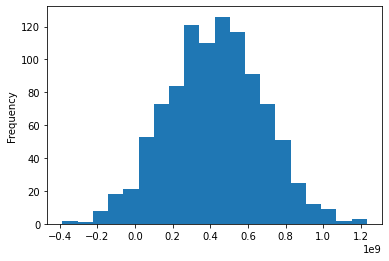


Метрики по 2-ому региону:
Средняя выручка: 453276529.013356
2.5%-квантиль: 61017386.44370647
97.5%-квантиль: 824503233.4022579
Риски убытков: 1.0999999999999999%


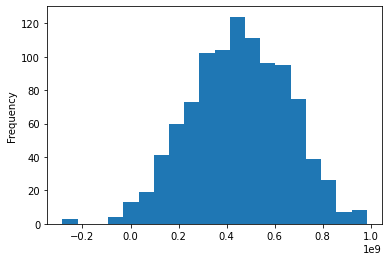


Метрики по 3-ому региону:
Средняя выручка: 353048911.2383331
2.5%-квантиль: -173194863.12320346
97.5%-квантиль: 841617019.4696476
Риски убытков: 9.4%


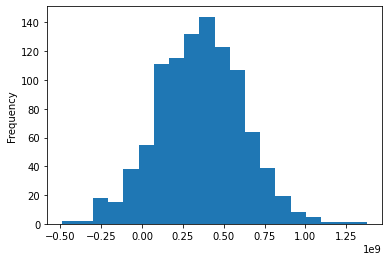

In [ ]:
turn = 1
for reg in df_0, df_1, df_2:
    print(f'Метрики по {turn}-ому региону:')
    region_report(reg)
    turn += 1
    print()

### Выбор региона

Для выбора региона для разработки скважин по условию необходимый уровень рисков составляет не более 2.5%.
Среди трёх регионов лишь один удовлетворяет заданным условиям, риски убытков при разработке скважин в этом регионе составляют **1.1%**.

Таким образом, **для разработки предлагается второй регион** (записан в geo_data_1).

## Вывод

- Данные загружены и изучены:
    - Дефектов в данных нет (нет дубликатов, нет пропусков, типы данных корректны).
    - Есть лишний столбец `id`, не несущий информации.
    - Распределение целевого признака нормальное в 1 и 3 регионах, а во втором соответствует равномерному с двумя пиками в минимальных и максимальных значениях.
- Данные подготовлены к дальнейшей работе:
    - Избавились от лишнего столбца, не несущего полезной информации.
    - Нашли вероятную причину необычного распределения во втором регионе: **один из признаков ('f2') имеет необычное распределение:** (для низких значений продукта практичеки равен нулю, для значений до 120 равномерно распределён в интервале 1-4 и для значений более 120 равен 5 с очень малым разбросом).
    - Масштабировали нецелевые признаки, чтобы они вносили равный вклад в обучение модели.
- Обучили и проверели модели:
    - Показатели RMSE для моделей во всех трёх регионах лучше, чем для константных моделей:
        - Регион 1: RMSE для обученной модели = 37.68, RMSE для константной модели: 44.34
        - Регион 2: RMSE для обученной модели = 0.89, RMSE для константной модели: 45.94
        - Регион 3: RMSE для обученной модели = 40.03, RMSE для константной модели: 44.76
    - RMSE для модели по второму региону близка к значению 1 судя по всему из-за особенностей распределения данных в этом регионе (близкое к равномерному распределению).
    - Средний запас продукта по предсказанию обученной модели совпадает со средним запасом продукта константной модели в каждом регионе, что так же говорит о хорошей работе моделей, так как из-за характера распределения данных истинное среднее значение целевого признака должно быть очень близко к среднему значению для константной модели.
        - Регион 1: средний запас продукта по предсказанию: 92.52, средний запас продукта по константной модели: 92.51
        - Регион 2: средний запас продукта по предсказанию: 68.83, средний запас продукта по константной модели: 68.83
        - Регион 3: средний запас продукта по предсказанию: 95.00, средний запас продукта по константной модели: 95.01
- Провели подготовку к расчётам прибыли:
    - Расчитали минимальное значение объема продукта для разработки скважины, которое составило **111 единицам** продукта.
    - Написали функцию, с помощью которой посчитали прибыль для каждого региона по наиболее перспективным скважинам:
        - Регион 1: 3350579 тыс.рублей
        - Регион 2: 2415087 тыс.рублей
        - Регион 3: 2274130 тыс.рублей
- Посчитали риски и среднюю прибыль для каждого региона:
    - Регион 1: средняя выручка: 424945 тыс.рублей, риски убытков: 4.6%
    - Регион 2: средняя выручка: 453277 тыс.рублей, риски убытков: 1.1%
    - Регион 3: средняя выручка: 353049 тыс.рублей, риски убытков: 9.4%
- **Исходя из поставленных условий для разработки был предложен 2-ой регион.**